# Regresja

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [5]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [6]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [7]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [8]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)


In [9]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+03, tolerance: 3.424e+00
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+03, tolerance: 3.142e+00
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+03, to

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 2}

In [11]:
grid_1.cv_results_['mean_test_score'].reshape(4, -1)

array([[0.70805942, 0.81680208, 0.74702819, 0.63462343],
       [0.70014515, 0.83003047, 0.73343859, 0.63043122],
       [0.66429641, 0.82359064, 0.75795199, 0.61636726],
       [0.52367919, 0.80580758, 0.7581234 , 0.61997622]])

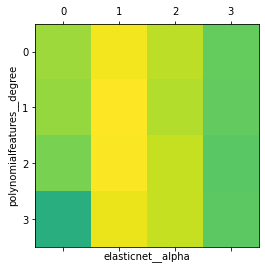

In [12]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [14]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

ValueError: Invalid parameter elasticnet for estimator Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=1, random_state=123))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [11]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
# models.append(('Lasso', grid_2.best_estimator_))
# models.append(('Ridge', grid_3.best_estimator_))
# models.append(('LR', grid_4.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.26193334547185143
Explained variance score: 0.2623757558442531
Median absolute error: 2.037245534344775
Mean squared error: 13.922077497699014
Mean absolute errors: 2.785642785357498


In [12]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet'])#,'Lasso','Ridge','LR'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.261933,0.262376,2.037246,13.922077,2.785643
